### Dataset link: https://challenge2018.isic-archive.com/task1/training/

In [1]:
# Import libraries

import os
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.transform import resize
from skimage import io
import numpy as np
from tqdm import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable

ROOT_DIR = os.path.abspath("../")
DATASET_NAME = "ISIC2018"
DATASET_PATH = os.path.join(ROOT_DIR, "datasets", DATASET_NAME)
print(os.listdir(DATASET_PATH))


# Data dir
#-------------------
#ISIC2018_Task1_Training_GroundTruth - Lesion masks
#ISIC2018_Task1-2_Training_Input - Lesion images
#ISIC2018_Task1-2_Training_Input.zip
#ISIC2018_Task1_Training_GroundTruth.zip

['ISIC2018_Task1_Training_GroundTruth', 'ISIC2018_Task1-2_Training_Input']


In [2]:
# Read train data
train_img_files = next(os.walk("{}/ISIC2018_Task1-2_Training_Input/".format(DATASET_PATH)))[2]
train_msk_files = next(os.walk("{}/ISIC2018_Task1_Training_GroundTruth/".format(DATASET_PATH)))[2]

train_img_files.sort()
train_msk_files.sort()

print(len(train_img_files))
print(len(train_msk_files))

2596
2596


In [3]:
IMG_DIM = (192, 256) # H, W

images_rs = []
masks_rs = []

for img_fl, mask_fl in tqdm(zip(train_img_files, train_msk_files)):

    if(img_fl.split('.')[-1]=='jpg'):

        img = io.imread('{}/ISIC2018_Task1-2_Training_Input/{}'.format(DATASET_PATH, img_fl))
        img = resize(img, IMG_DIM, mode='constant')
        images_rs.append(img)


        mask = io.imread('{}/ISIC2018_Task1_Training_GroundTruth/{}'.format(DATASET_PATH, mask_fl))
        mask = np.expand_dims(resize(mask, IMG_DIM).round(), axis=-1)
        masks_rs.append(mask)
    
    img = None
    mask = None

    
images_rs = np.array(images_rs)
masks_rs = np.array(masks_rs)
images_rs.shape, masks_rs.shape

2596it [2:26:36,  3.39s/it]


((2594, 192, 256, 3), (2594, 192, 256, 1))

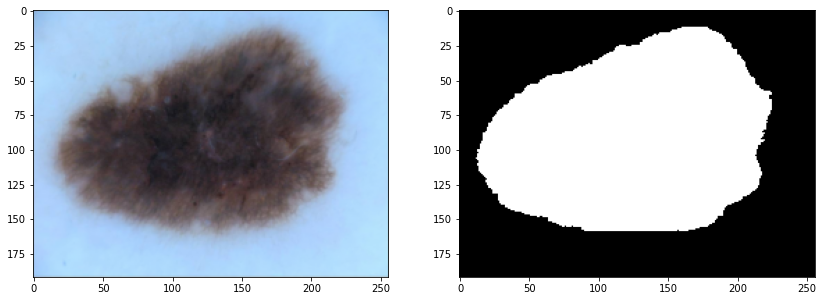

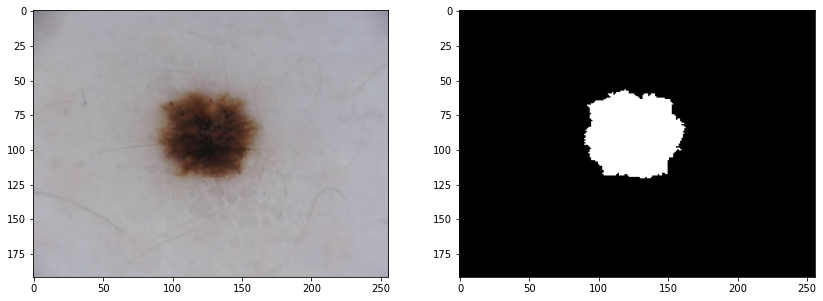

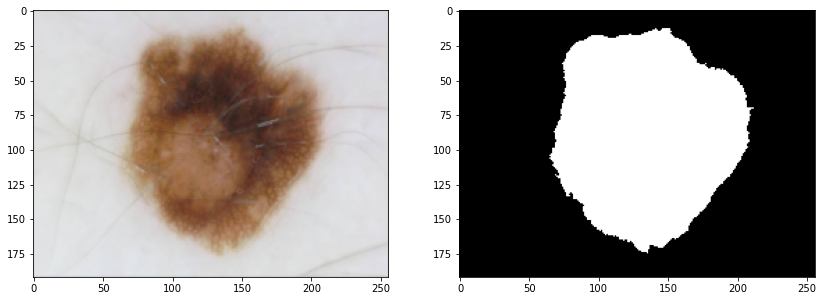

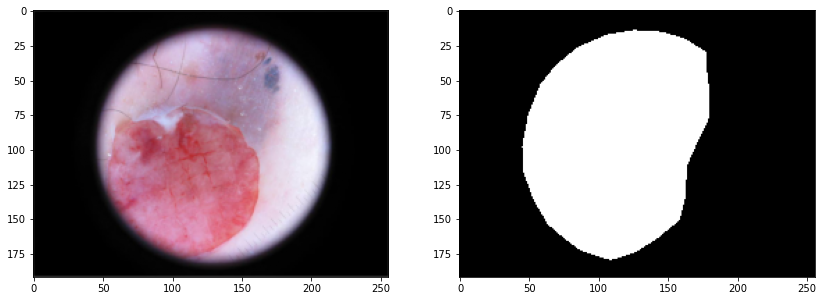

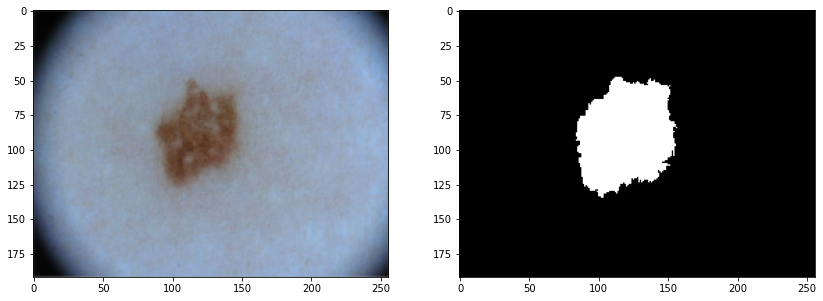

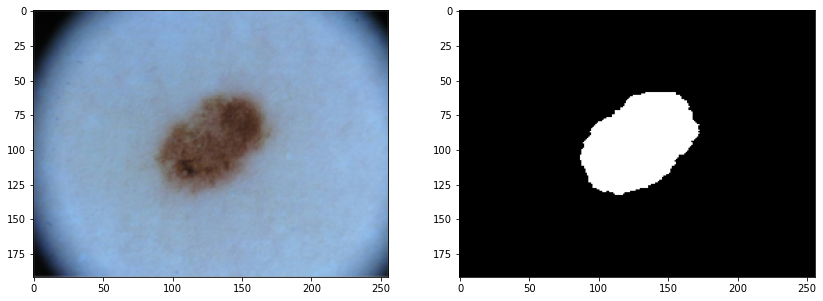

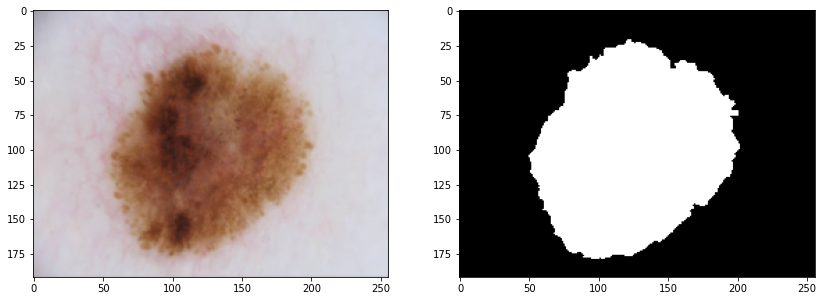

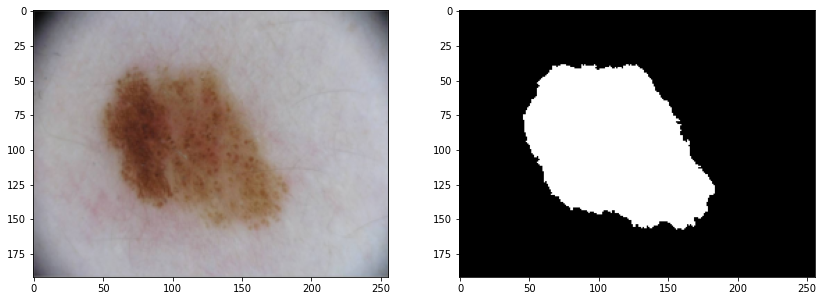

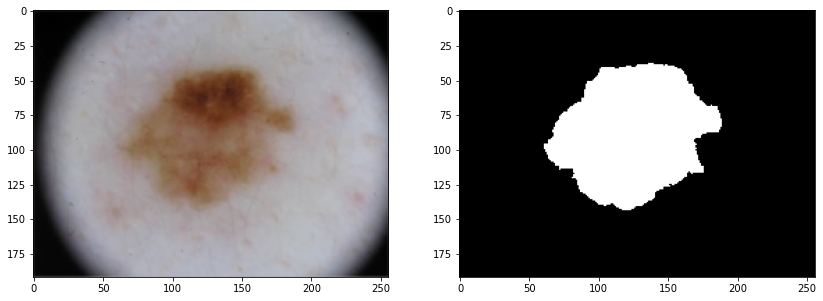

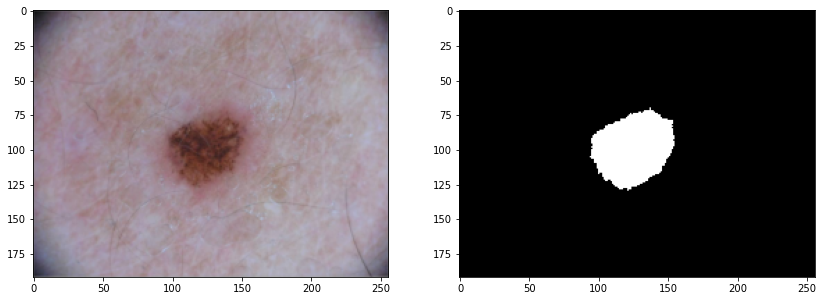

In [4]:
for img, mask in zip(images_rs[:10], masks_rs[:10]):
    
    mask = np.squeeze(mask, axis=-1) # change to H, W
    
    
    fig,_ = plt.subplots(nrows=1, ncols=2, figsize=(14,12))
    fig.axes[0].imshow(img)
    fig.axes[1].imshow(mask, cmap='gray')
    plt.show()

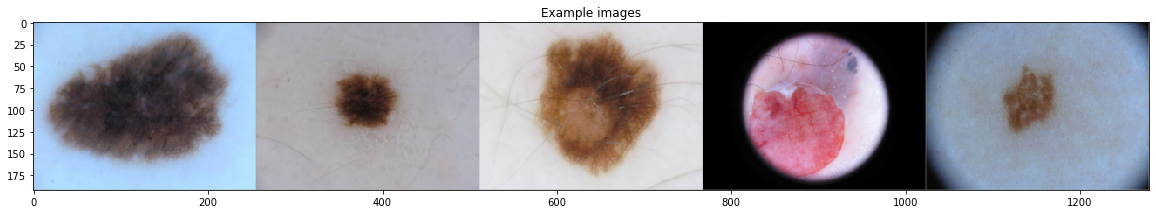

In [5]:
plt.rcParams['figure.figsize'] = (20, 5)
plt.title("Example images")
plt.figsize=(14,12)
plt.imshow(np.concatenate(images_rs[:5].transpose((0,1,2,3)),axis=1), interpolation='none')

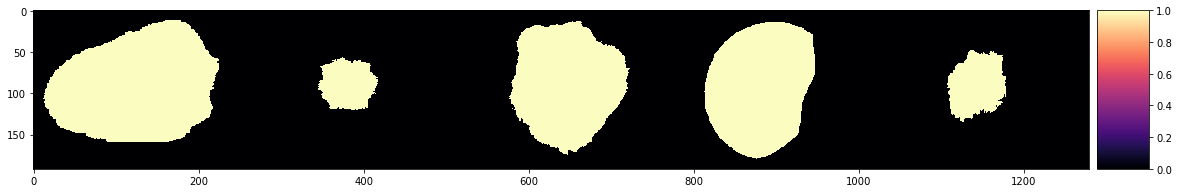

In [6]:
fig = plt.figure(1, figsize=(20, 5))
ax = plt.gca()
im = ax.imshow(np.concatenate(masks_rs[:5,:,:,0],axis=1), cmap='magma', interpolation='none') # cmap='bwr'
divider = make_axes_locatable(ax) 
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax)

In [7]:
from skimage.segmentation import mark_boundaries, find_boundaries

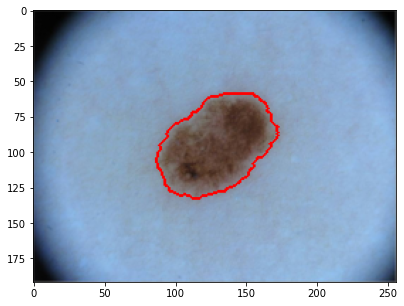

In [8]:
ct = 5
edges_pz = mark_boundaries(images_rs[ct], masks_rs[ct].squeeze().astype(np.int),color=(1,0,0), mode='thin')
plt.imshow(edges_pz)

In [9]:
images_rs.shape, masks_rs.shape

((2594, 192, 256, 3), (2594, 192, 256, 1))

In [10]:
np.save("{}/ISIC2018_images.npy".format(DATASET_PATH), images_rs)
np.save("{}/ISIC2018_mask.npy".format(DATASET_PATH), masks_rs)